Problem Statement : 

Understanding the factors that influence people’s to take mental health treatment. These factors include family history, work conditions, and available support. Identifying these can help improve mental health services and encourage more people to get the help they need.



In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score 

In [426]:
df = pd.read_csv("survey.csv")

In [427]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [428]:
df.shape

(1259, 27)

In [429]:
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [430]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool>

In [431]:
df.dropna(inplace=True)


In [432]:
df.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64

In [433]:
# Columns to keep
keep_cols = ['treatment','Age','family_history', 'work_interfere', 'remote_work', 'tech_company','wellness_program','mental_health_consequence']

# Columns to drop = jo keep_cols me nahi hain
drop_cols = [col for col in df.columns if col not in keep_cols]

# Drop those columns
df.drop(columns=drop_cols, inplace=True)


In [434]:
df.isna().sum()

Age                          0
family_history               0
treatment                    0
work_interfere               0
remote_work                  0
tech_company                 0
wellness_program             0
mental_health_consequence    0
dtype: int64

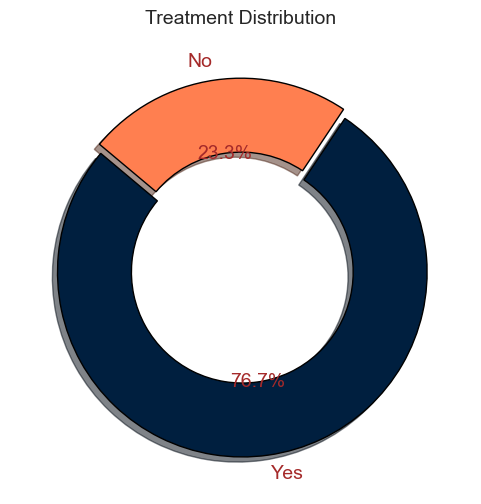

In [435]:
# Treatment counts
treatment_counts = df['treatment'].value_counts()

colors = ['#001f3f', '#ff7f50']
explode = (0.05, 0)

plt.figure(figsize=(6,6))

plt.pie(
    treatment_counts,
    labels=treatment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'width': 0.4},
    textprops={'fontsize': 14, 'color': 'brown'}  
)

plt.title('Treatment Distribution', fontsize=14)
plt.show()


Observation : Most people in the dataset are taking mental health treatment, while fewer people are not. This shows that a majority are seeking help for their mental health.

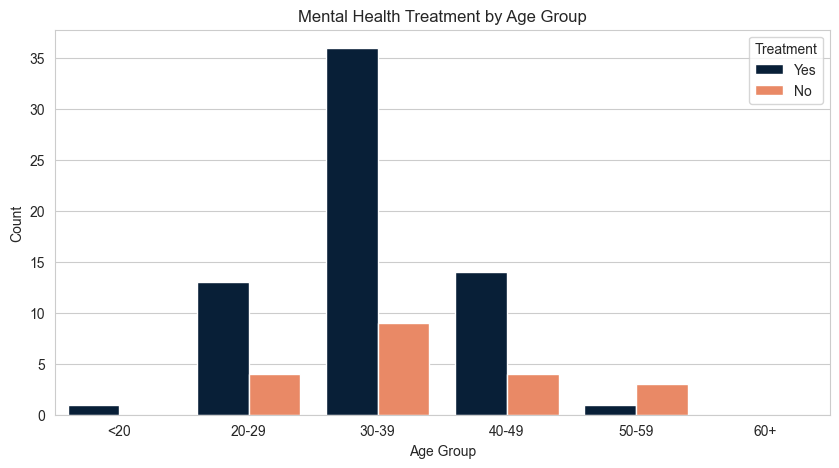

In [436]:

# Set whitegrid style
sns.set_style('whitegrid')

# Age groups create karna (bins)
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10,5))
sns.countplot(x='age_group', hue='treatment', data=df, palette=['#001f3f', '#ff7f50'])
plt.title('Mental Health Treatment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


Observation : People aged 30 to 39 are taking mental health treatment more than other age groups. This suggests that this age group is more likely to seek help for their mental health.










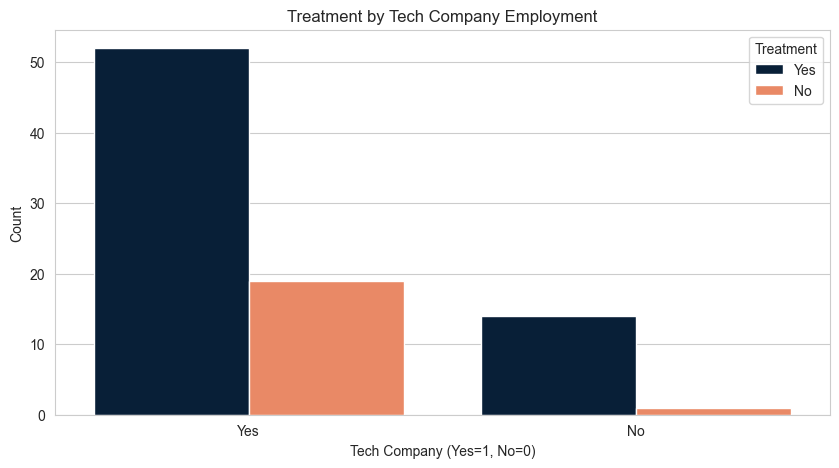

In [437]:

sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
sns.countplot(x='tech_company', hue='treatment', data=df, palette=['#001f3f', '#ff7f50'])
plt.title('Treatment by Tech Company Employment')
plt.xlabel('Tech Company (Yes=1, No=0)')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


Observation : People working in tech companies are more likely to take mental health treatment.










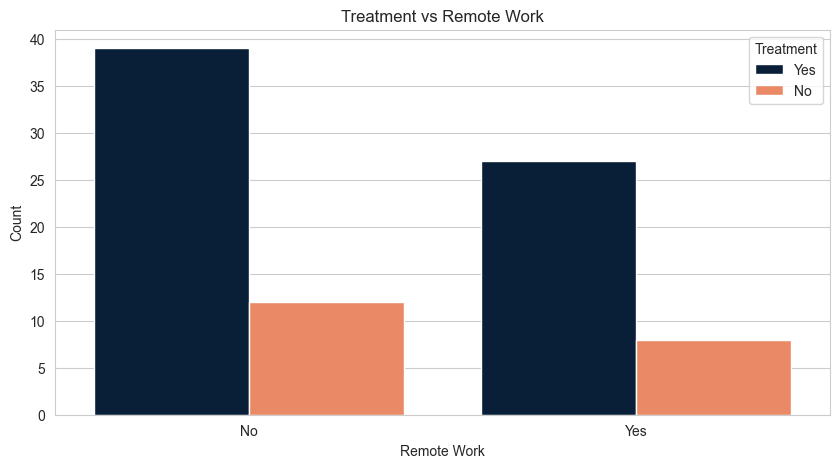

In [438]:

sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
sns.countplot(x='remote_work', hue='treatment', data=df, palette=['#001f3f', '#ff7f50'])
plt.title('Treatment vs Remote Work')
plt.xlabel('Remote Work')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


Observation : The graph shows that people who do not work remotely are more likely to take mental health treatment.










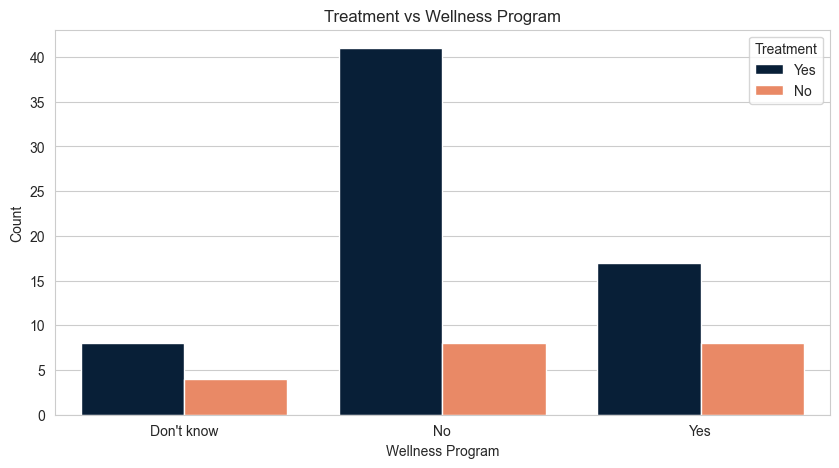

In [439]:

sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
sns.countplot(x='wellness_program', hue='treatment', data=df, palette=['#001f3f', '#ff7f50'])
plt.title('Treatment vs Wellness Program')
plt.xlabel('Wellness Program')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


Observation : The graph shows that employees whose companies do not offer wellness programs are more likely to take mental health treatment

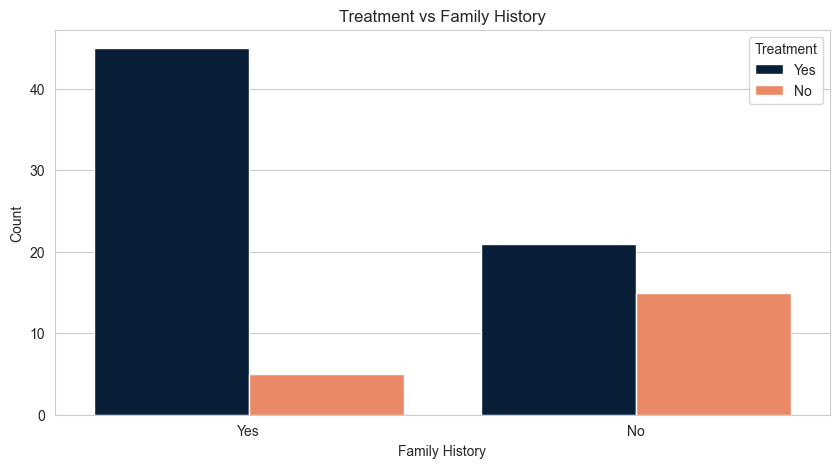

In [440]:

sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
sns.countplot(x='family_history', hue='treatment', data=df, palette=['#001f3f', '#ff7f50'])
plt.title('Treatment vs Family History')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


Observation : People who have a family history of mental health issues are more likely to take treatment.










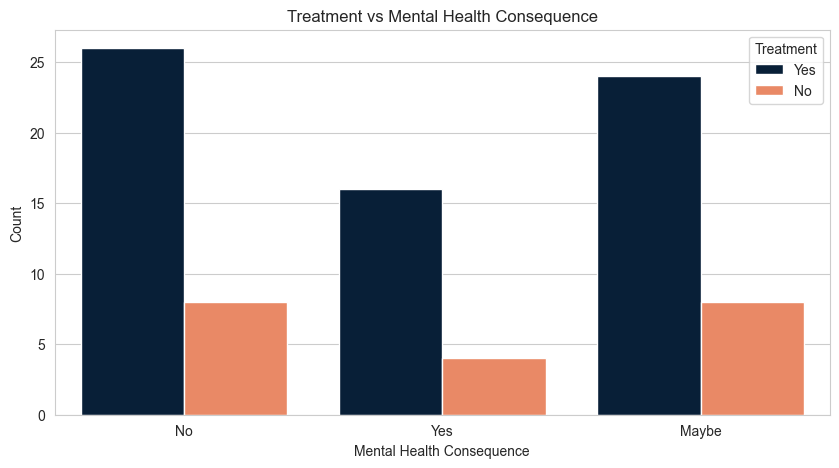

In [441]:

sns.set_style('whitegrid')

plt.figure(figsize=(10,5))
sns.countplot(x='mental_health_consequence', hue='treatment', data=df, palette=['#001f3f', '#ff7f50'])
plt.title('Treatment vs Mental Health Consequence')
plt.xlabel('Mental Health Consequence')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


Observation : People who do not experience mental health consequences ('No') are taking more treatment than those who do ('Yes') or are unsure ('Maybe').

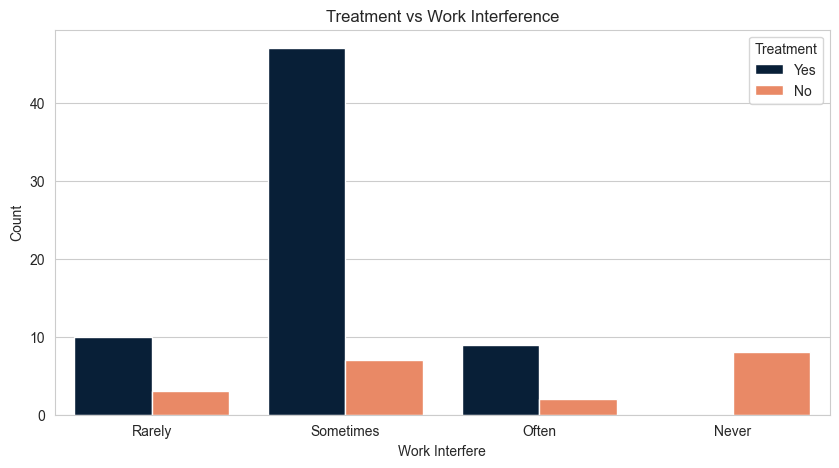

In [442]:

sns.set_style('whitegrid')

plt.figure(figsize=(10, 5))
sns.countplot(x='work_interfere', hue='treatment', data=df, palette=['#001f3f', '#ff7f50'])
plt.title('Treatment vs Work Interference')
plt.xlabel('Work Interfere')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()


Observation : People who sometimes face work interference are more likely to take treatment.










Conclusion : People who have family history of mental health issues, face problems at work, or don’t get wellness help at their job are more likely to take mental health treatment. Also, people not working from home and those working in tech companies take treatment more. Mostly, people aged 30-39 take treatment.

In [443]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False)

encoded_data=encoder.fit_transform(df[['family_history','treatment','work_interfere','remote_work','tech_company','wellness_program','mental_health_consequence']])

df2=pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['family_history','treatment','work_interfere','remote_work','tech_company','wellness_program','mental_health_consequence']))

result=pd.concat([df,df2], axis=1)
result

,Age,family_history,treatment,work_interfere,remote_work,tech_company,wellness_program,mental_health_consequence,age_group,family_history_No,...,remote_work_No,remote_work_Yes,tech_company_No,tech_company_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes
24,33.0,Yes,Yes,Rarely,No,Yes,Don't know,No,30-39,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
25,35.0,Yes,Yes,Sometimes,No,No,No,Yes,30-39,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
33,42.0,Yes,Yes,Sometimes,Yes,Yes,Yes,Maybe,40-49,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
45,38.0,Yes,Yes,Sometimes,No,Yes,No,No,30-39,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
49,30.0,Yes,Yes,Rarely,No,Yes,No,Maybe,30-39,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [444]:
result = pd.get_dummies(df,dtype=int,drop_first=True)
result

,Age,family_history_Yes,treatment_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,remote_work_Yes,tech_company_Yes,wellness_program_No,wellness_program_Yes,mental_health_consequence_No,mental_health_consequence_Yes,age_group_20-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60+
24,33,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0
25,35,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
33,42,1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,0
45,38,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0
49,30,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,56,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0
1190,44,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0
1219,38,0,1,0,0,1,1,1,0,1,1,0,0,1,0,0,0
1221,46,1,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0


In [445]:
X = result.drop('treatment_Yes', axis=1)
Y= result['treatment_Yes']

In [446]:
x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [447]:
print('Shape of X_train is -' , x_train.shape)
print('Shape of X_train is -' , x_train.shape)
print('Shape of y_train is -' , y_train.shape)
print ('Shape of y_train is -' , y_train.shape)

Shape of X_train is - (68, 16)
Shape of X_train is - (68, 16)
Shape of y_train is - (68,)
Shape of y_train is - (68,)


In [448]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [449]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)

# Checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.8888888888888888
